In [158]:
import yaml
import pandas as pd
with open('config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)
train_df = pd.read_csv(cfg['selary']['train_dataset'], low_memory=False)

In [4]:
from random import randrange
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

In [106]:
train_df.isna().sum()



ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [17]:
def dropping(train_df, colums):
    print(colums)
    for i in colums:
        train_df.drop(columns=[i], inplace=True)
    return train_df
#train_df = dropping(train_df, ['ID', 'Name', 'SSN', 'Customer_ID'])


In [ ]:
def hide(train_df):
    train_df['Month'] = pd.Series(label_encoder.fit_transform(train_df['Month']))
    train_df['Occupation'] = pd.Series(label_encoder.fit_transform(train_df['Occupation']))
    train_df['Type_of_Loan'] = pd.Series(label_encoder.fit_transform(train_df['Type_of_Loan']))
    train_df['Payment_Behaviour'] = pd.Series(label_encoder.fit_transform(train_df['Payment_Behaviour']))
    train_df['Credit_Score'] = train_df['Credit_Score'].replace({'Poor': 0, 'Standard': 1, 'Good':2})
    train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].replace({'No': 0, 'NM': 1, 'Yes':2})
    train_df['Credit_Mix'] = train_df['Credit_Mix'].replace({'Bad': 0, 'Standard': 1, '-':2, 'Good':3})

In [18]:
def label_incode(train_df):
    label_encoder = LabelEncoder()
    col = ['Occupation', 'Type_of_Loan', 'Month', 'Credit_Mix', 'Payment_Behaviour', 'Credit_Score', 'Payment_of_Min_Amount']
    for i in col:
        train_df[i] = pd.Series(label_encoder.fit_transform(train_df[i]))
    return train_df
label_encoderr = LabelEncoder()
#label_encoder = LabelEncoder()


In [19]:
def parse_data(value):
    if type(value) == float:
        return value
    else: return int(value.split(' ')[0]) *12 + int(value.split(' ')[3])
#train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(parse_data)

In [20]:
def convert_to_float_or_random(value):
    if type(value) == float:
        return value
    elif type(value) is int:
        return value
    elif value == '__10000__':
        return 11111111111111111
    elif value == "__-333333333333333333333333333__":
        return 33333333333333333
    elif value == '_':
        return 0
    elif value[-1] == '_':
        try: return float(value[0:-1])
        except ValueError:
            print(value)
    else:
        try:
            return float(value)
        except ValueError:
            print(value)
#train_df[train_df.select_dtypes(include='object').columns] =train_df.select_dtypes(include=['object']).map(convert_to_float_or_random)

In [21]:
from sklearn.model_selection import train_test_split
X = train_df
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [22]:
def salary (df):
    if df['Monthly_Inhand_Salary'].isnull().any():
        df['Monthly_Inhand_Salary'] = df['Annual_Income']/12
        return df
#X_train = salary(X_train)
#X_test = salary(X_test)

In [112]:
def mean_value(df, columns):
    for col in columns:
        X_train[col] = X_train[col].fillna(X_train[col].mean())
    return df
    

In [23]:
def drop_missing(train_df):
    num_сols_with_missing = [col for col in train_df.columns
                         if train_df[col].isnull().any()]
    train_df=train_df.dropna(subset=num_сols_with_missing)
    return train_df
#X_train = drop_missing(X_train)
#X_test = drop_missing(X_test)

In [162]:
train_df = pd.read_csv(cfg['selary']['train_dataset'], low_memory=False)

train_df = dropping(train_df, ['ID', 'Name', 'SSN', 'Customer_ID'])

train_df['Type_of_Loan'] = train_df['Type_of_Loan'].fillna("Not Specified")

label_encoderr = LabelEncoder()

train_df = label_incode(train_df)

train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(parse_data)

train_df[train_df.select_dtypes(include='object').columns] =train_df.select_dtypes(include=['object']).map(convert_to_float_or_random)

train_df = salary(train_df)

print(train_df.shape)

from sklearn.model_selection import train_test_split
X = train_df
X_train, X_test = train_test_split(X,  test_size=0.2, random_state=42)

print(X_train.shape)

columns = ['Age', "Annual_Income", "Monthly_Inhand_Salary", 'Num_Bank_Accounts','Num_Credit_Card', "Changed_Credit_Limit", 'Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly',  'Total_EMI_per_month', 'Outstanding_Debt', "Monthly_Balance", "Delay_from_due_date" ]

for col in columns:
    X_train = X_train.drop(X_train[X_train[col] < -1].index)
    X_test = X_test.drop(X_test[X_test[col] < -1 ].index)

print(X_train.shape)

for col in columns:
    X_train = X_train.drop(X_train[X_train[col] > X_train[col].quantile(.95)].index)
    X_test = X_test.drop(X_test[X_test[col] > X_test[col].quantile(.95)].index)


print(X_train.shape)

X_train = mean_value(X_train, ['Num_of_Delayed_Payment','Amount_invested_monthly','Monthly_Balance', 'Credit_History_Age', 'Num_Credit_Inquiries'])
X_test = mean_value(X_test, ['Num_of_Delayed_Payment','Amount_invested_monthly','Monthly_Balance', 'Credit_History_Age', 'Num_Credit_Inquiries'])

X_train = drop_missing(X_train)
X_test = drop_missing(X_test)



['ID', 'Name', 'SSN', 'Customer_ID']
(100000, 24)
(80000, 24)
(74757, 24)
(38970, 24)


In [144]:
X_train

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
48955,0,25.0,0,112882.68,9406.890000,5,1,10,4.0,981,...,1,722.90,40.090839,347.000000,1,353.616124,166.446410,1,688.426466,0
44966,4,49.0,12,28101.46,2341.788333,5,7,8,3.0,5746,...,2,454.67,23.607892,321.000000,1,268.268012,169.748954,6,242.921080,0
13568,3,34.0,8,22438.27,1869.855833,7,7,9,4.0,2982,...,3,167.57,27.094189,238.608934,1,58.436308,105.165644,4,292.083631,2
92727,1,28.0,10,20975.40,1747.950000,2,3,9,1.0,0,...,1,731.40,26.205042,291.000000,0,16.196792,67.158201,2,361.040007,0
51349,5,36.0,10,31751.83,2645.985833,5,4,18,3.0,5750,...,2,110.73,24.301922,289.000000,2,58.006937,120.397883,0,369.093763,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64820,7,29.0,8,62827.47,5235.622500,4,7,16,1.0,684,...,2,1031.09,33.472922,210.000000,0,39.065197,616.958135,6,178.138918,2
41090,6,46.0,5,33647.34,2803.945000,8,5,9,4.0,3850,...,2,1152.93,29.109339,288.000000,1,102.557556,366.987038,6,100.949906,2
16023,1,39.0,9,40908.16,3409.013333,0,7,10,0.0,3463,...,1,1210.40,27.931534,209.000000,1,0.000000,295.075706,4,302.225628,2
44131,0,41.0,15,31490.63,2624.219167,7,5,17,0.0,3463,...,2,708.50,25.927089,238.608934,2,0.000000,196.709320,4,349.912597,2


In [203]:
class HotEncode:
    def __init__(self, train_df):
        self.train_df = train_df

    def encoderr(self, odf):
        encoder = OneHotEncoder(sparse_output=False)
        df = odf.to_frame()
        encodedData = encoder.fit_transform(df)
        encoded_df = pd.DataFrame(encodedData, columns=encoder.get_feature_names_out(df.columns))
        self.train_df.drop(columns=[odf.name], inplace=True)
        self.train_df = pd.concat([self.train_df,encoded_df], axis=1)
        return self.train_df

encoder = HotEncode(train_df)
train_df = encoder.encoderr(train_df['Payment_Behaviour'])
train_df = encoder.encoderr(train_df['Payment_of_Min_Amount'])
train_df = encoder.encoderr(train_df['Credit_Mix'])
#train_df = encoder.encoderr(train_df['Credit_Score'])

In [125]:
print(f"Размеры X_train и y_train: {X_train.shape}")
print(f"Размеры X_test и y_test: {X_test.shape}")


Размеры X_train и y_train: (38653, 24)
Размеры X_test и y_test: (7525, 24)


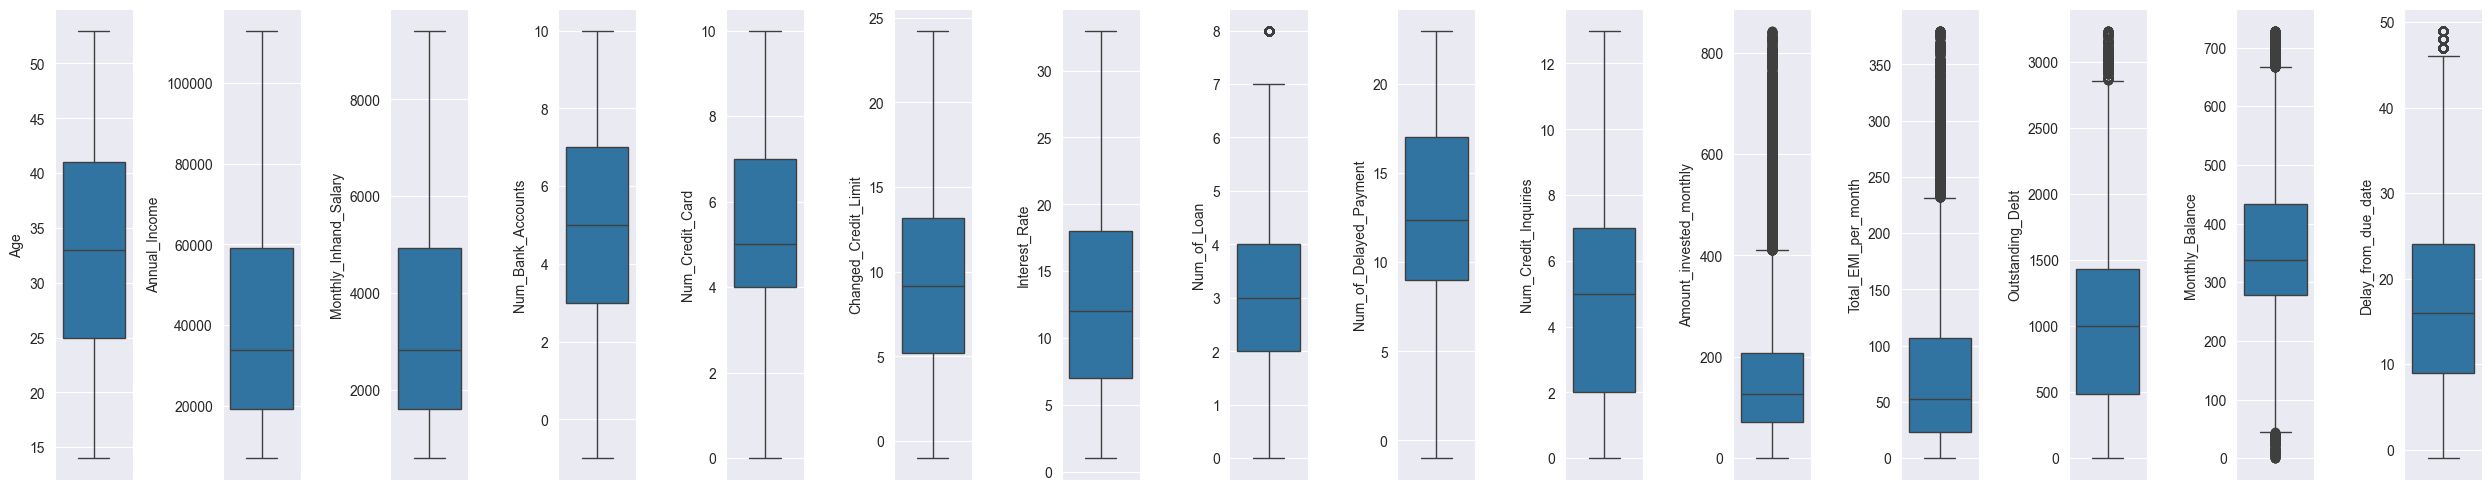

In [163]:
out_col = ['Age', "Annual_Income", "Monthly_Inhand_Salary", 'Num_Bank_Accounts','Num_Credit_Card', "Changed_Credit_Limit", 'Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly',  'Total_EMI_per_month', 'Outstanding_Debt', "Monthly_Balance", "Delay_from_due_date" ]
#out_col = X_train.columns.tolist()
fig, axes = plt.subplots(1, 15, figsize=(25, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=X_train[col], data=X_train, ax=ax)    
fig.tight_layout(pad=1)

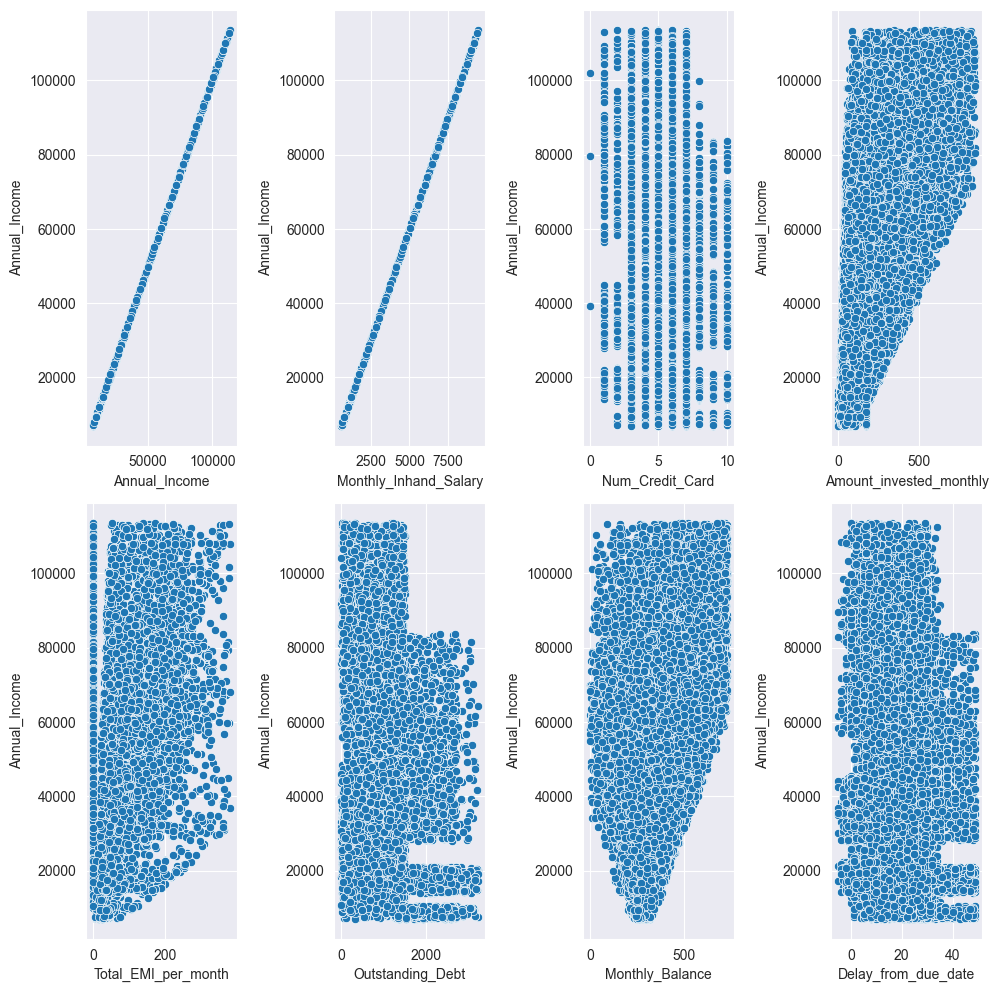

In [120]:
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
out_col = [ "Annual_Income", "Monthly_Inhand_Salary", 'Num_Credit_Card', 'Amount_invested_monthly',  'Total_EMI_per_month', 'Outstanding_Debt', "Monthly_Balance", "Delay_from_due_date" ]
axes_flattened = axes.reshape(-1)
for i in range(len(out_col)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=out_col[i],
        y='Annual_Income',
        data=X_train,
        ax=ax,
    )
fig.tight_layout(pad=1.0)

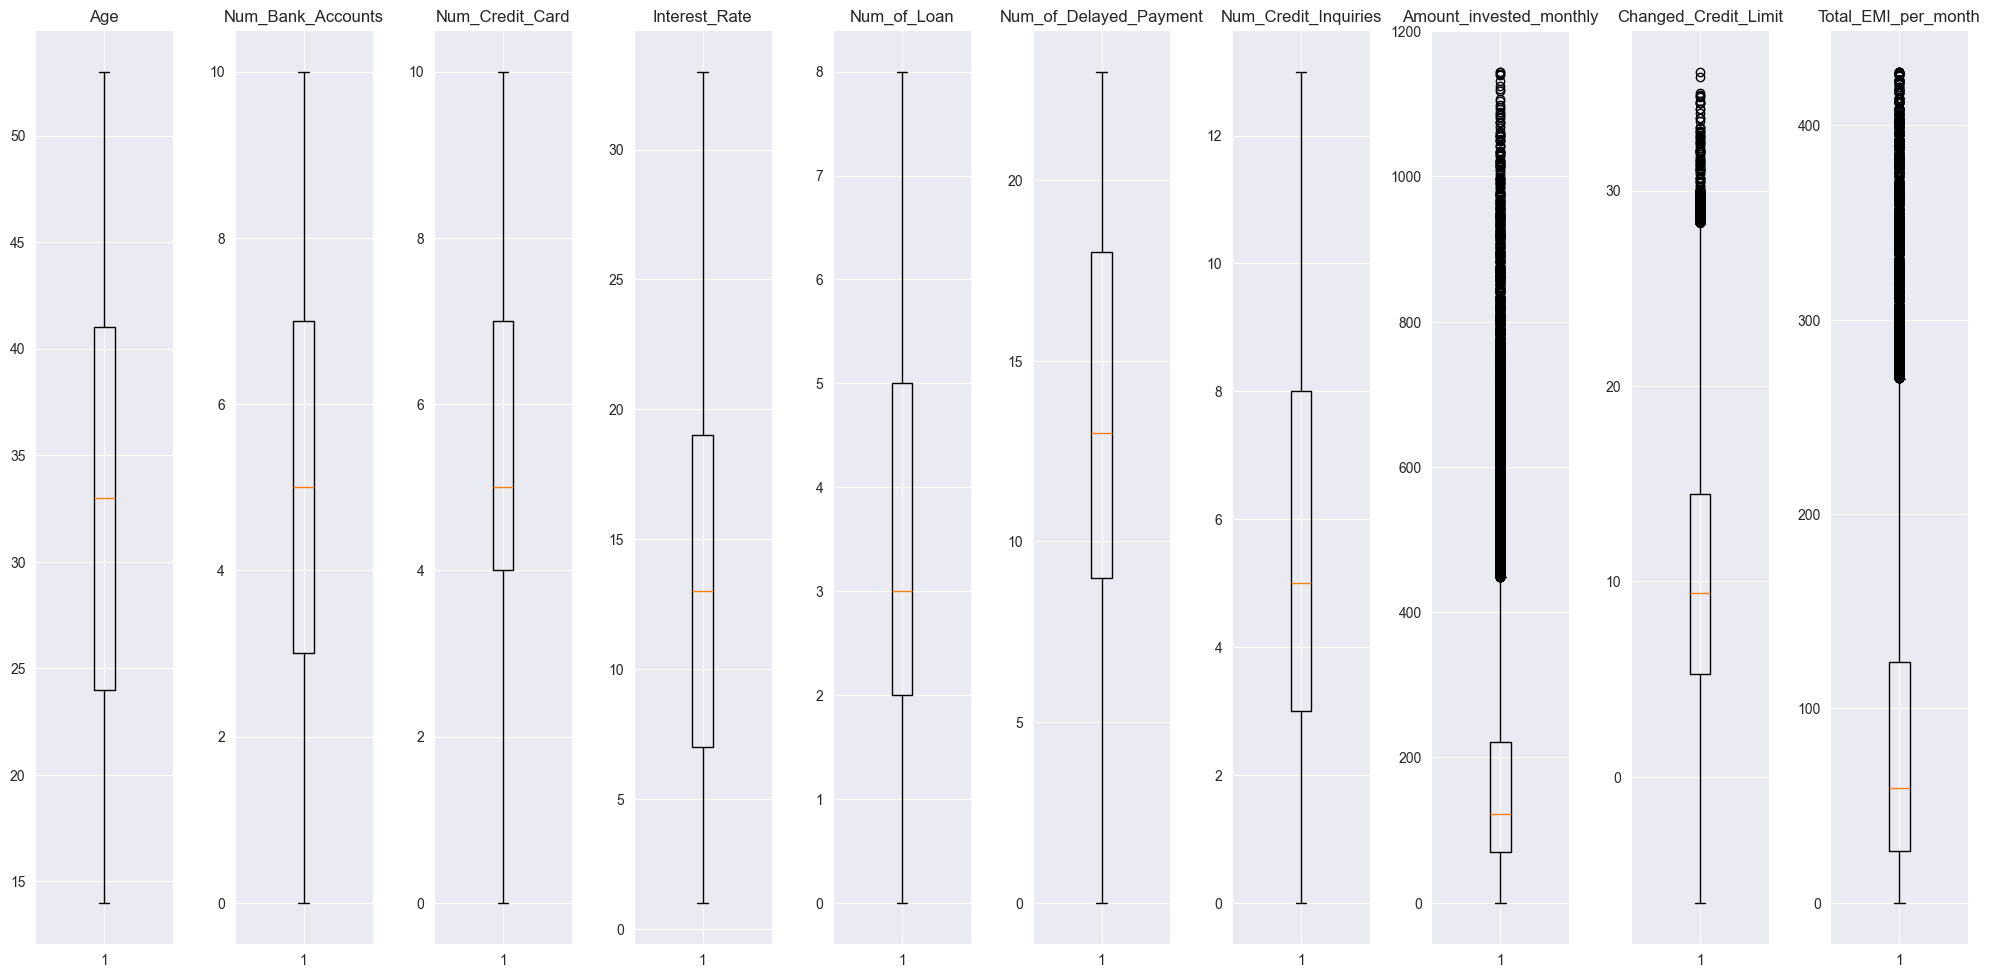

In [53]:
out_col = ['Age', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly', 'Changed_Credit_Limit', 'Total_EMI_per_month' ]
fig, axes = plt.subplots(1, 10, figsize=(20, 10))

for ax, col in zip(axes, out_col):
    ax.boxplot(X_train[col], vert = True)
    ax.set_title(col)  
fig.tight_layout(pad=1.5)
plt.show()

In [52]:
bins = [0, 1000, 2000, 3000, 4000, 5000,6000,7000,8000, 10000]
lab  = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-10000']
train_df['Interval'] = pd.cut(train_df['Monthly_Inhand_Salary'], bins=bins, labels=lab)
occupation_group = train_df.groupby('Interval', observed=False)
salary_in = (
    
    occupation_group['Amount_invested_monthly'].mean().reset_index(name = 'Anual_mean')
)

'''
fig, axes = plt.subplots(1,2,figsize=(22,8))
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(x='Interval', y='Anual_mean', data=salary_in, ax=axes[0])
sns.barplot()
'''
(train_df['Interval'].value_counts())

Interval
1000-2000     21147
2000-3000     13264
3000-4000      9669
5000-6000      6847
0-1000         6724
4000-5000      6369
8000-10000     5565
6000-7000      5374
7000-8000      3797
Name: count, dtype: int64

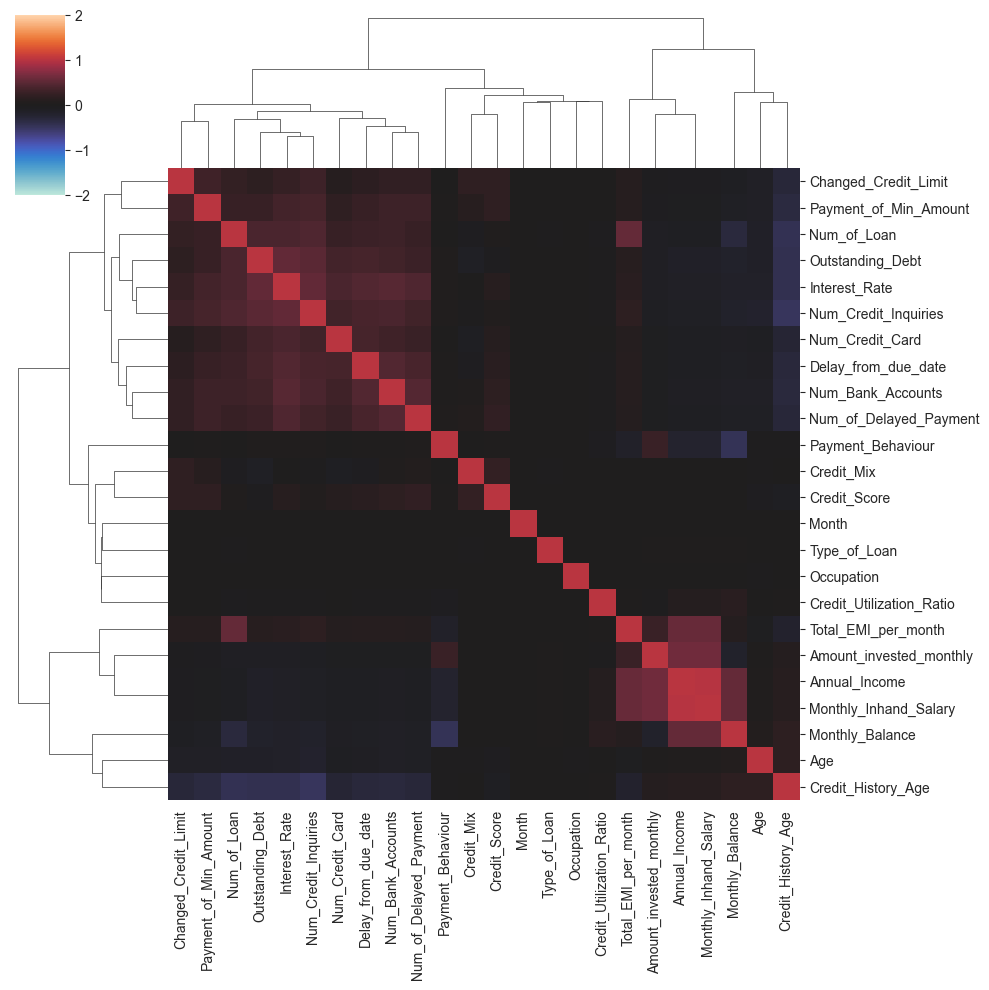

In [164]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-2.0,
        vmax=2.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(X_train, annot=None)


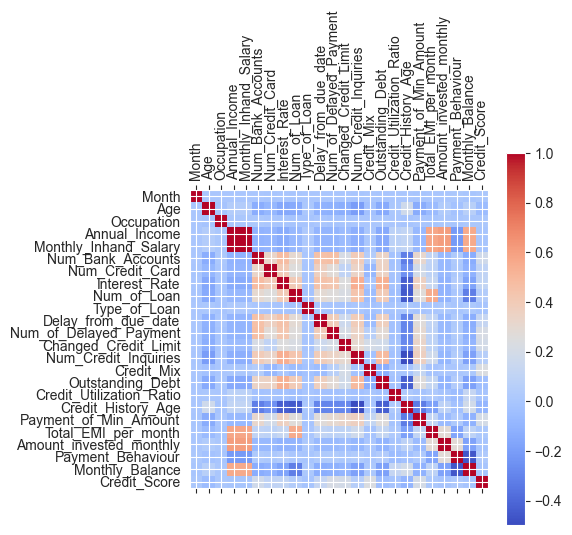

In [165]:
cor_mat = X_train.corr()
plt.matshow(cor_mat, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(cor_mat)), cor_mat.columns, rotation=90)
plt.yticks(range(len(cor_mat)), cor_mat.columns)
plt.show()

In [157]:
X_train.to_csv(r'D:\study\AI\PredictCreditScoreinit\train_3.csv', header=True, index=True)
X_test.to_csv(r'D:\study\AI\PredictCreditScoreinit\test_3.csv', header=True, index=True)